<a href="https://colab.research.google.com/github/matheus217/projeto-machine-learn/blob/master/SOM/SOM_kinect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
!pip install minisom

In [25]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "posicoesBHC.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/matheus217/PROJECT_2_MACHINE_LEARNING_AND_KINECT/master/"
DATA_PATH = "KINECTDATA/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls KINECTDATA

posicoesBHC.csv


In [26]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+'posicoesBHC.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


dataset.head(  )

print(X)

[[ 0.577941  -0.16796    2.10382   ...  0.496337  -1.01146    2.39307  ]
 [ 0.577908  -0.169476   2.1017    ...  0.496034  -1.01232    2.39018  ]
 [ 0.57794   -0.170435   2.09981   ...  0.495741  -1.01293    2.38754  ]
 ...
 [ 0.0319823 -0.0813758  2.9406    ...  0.148062  -1.08164    2.88246  ]
 [ 0.0318964 -0.0814569  2.94049   ...  0.159227  -1.11116    2.91462  ]
 [ 0.0318118 -0.0815319  2.94039   ...  0.165158  -1.1309     2.93787  ]]


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 60, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

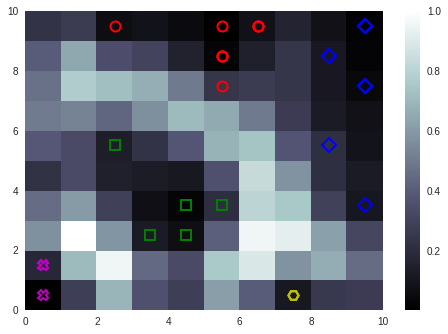

In [29]:
# Visualizing the results
#markers = ['o', 's', 'D', 'X', 'H']
#colors = ['r', 'g', 'b', 'm', 'y' ]
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', 'D', 'X', 'H']
colors = ['r', 'g', 'b', 'm', 'y' ]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#braco para baixo - circulo
#braco na horizontal - quadrado
#braco para cima - losango
#braco para baixo 2 - hexagono
#braco para cima 2 - X